# Heart Disease Prediction

Predicting whether a person has a ‘Heart Disease’ or ‘No Heart Disease’. 

It is a Classification Problem. Classifying the outcome into 2 classes:

1(ONE) as having Heart Disease and
0(Zero) as not having Heart Disease.

#### DataSet Description
There are 14 features(Columns) including the target. The data set includes features like:

target -- 0 - No Heart Disease
          1 - have Heart Disease

slope_of_peak_exercise_st_segment- (slope) (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

resting_blood_pressure- (trestbps) (type: int): resting blood pressure

chest_pain_type (cp) (type: int): chest pain type (4 values)

num_major_vessels (ca)(type: int): number of major vessels (0-) colored by flourosopy

fasting_blood_sugar_gt_120_mg_per_dl -- fbs (type: binary): fasting blood sugar > 120 mg/dl

resting_ecg_results - (restecg)  (type: int): resting electrocardiographic results (values 0,1,2)

serum_cholesterol_mg_per_dl - (chol) -(type: int): serum cholestoral in mg/dl

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

sex (type: binary): 0: female, 1: male
age (type: int): age in years

max_heart_rate_achieved-- (thalach) (type: int): maximum heart rate achieved (beats per minute)

exercise_induced_angina - (exang) - (type: binary): exercise-induced chest pain (0: False, 1: True)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('heart.csv')

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.shape

(303, 14)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Statistical summary

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


We can infer that in the 'age' column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.


In [24]:
count_class = df.groupby('sex').size()
print(count_class)

sex
0     96
1    207
dtype: int64


In [45]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

target-- 1 - person having heart disease
        
       0 - Person not having heart disease

In [13]:
#check for any null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### Checking the Null Values and we found that we do not have any null values in the dataset.

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


#### we notice that the dataset has no null values. this saved us from conveting the null values into some data or dropping


In [26]:
correlations = df.corr(method='pearson')
correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

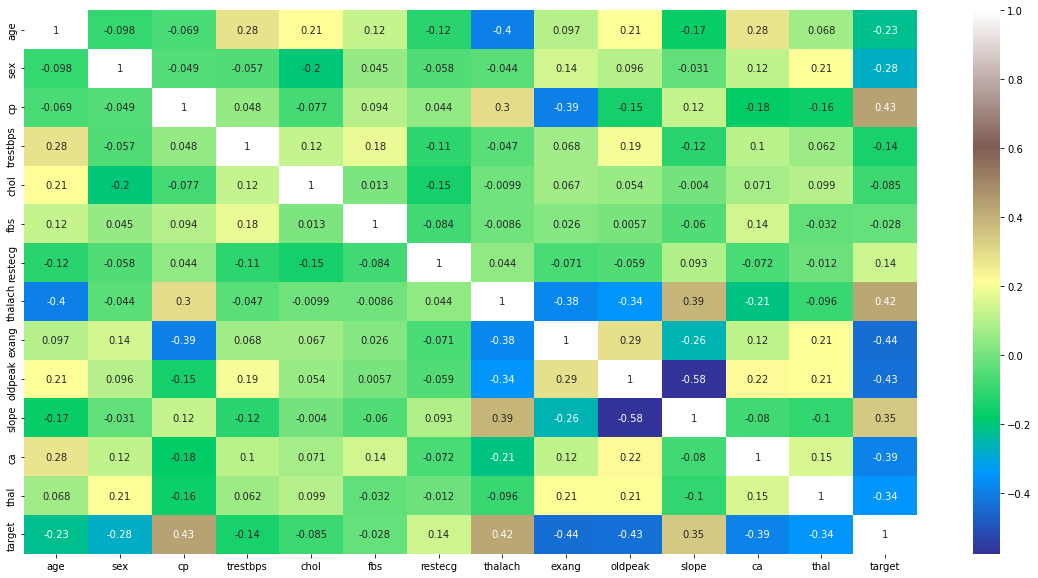

In [25]:
#Finding the correlation among the attributes
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

#### We observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

In [27]:
print(df.skew())

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


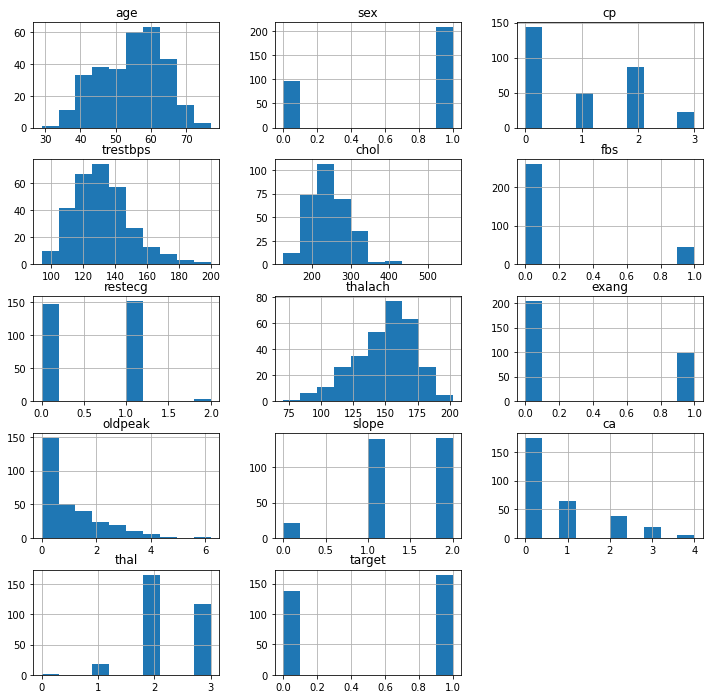

In [27]:
df.hist(figsize=(12,12), layout=(5,3));

With Histograms we can see the shape of each feature and provides the count of number of observations in each bin.

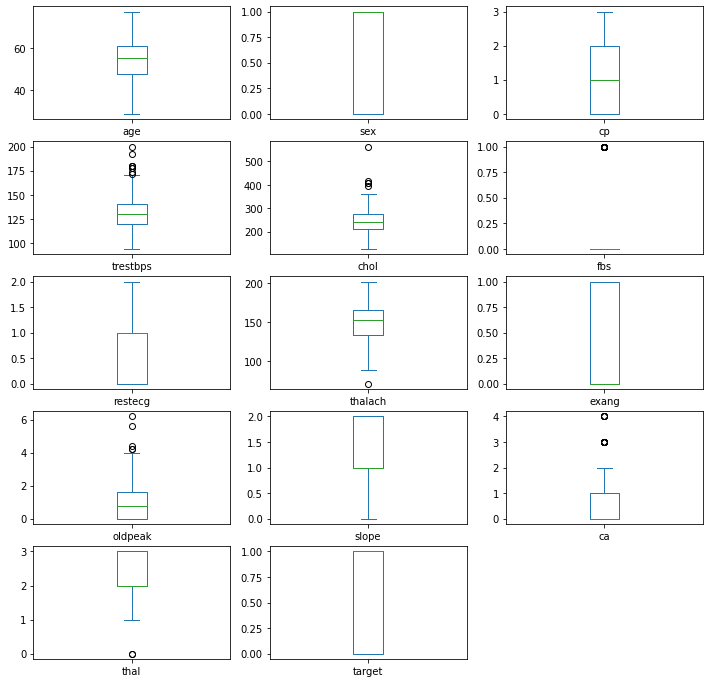

In [28]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

We can see the outliers in ca, chol, , oldpeak, thal

<AxesSubplot:xlabel='sex', ylabel='count'>

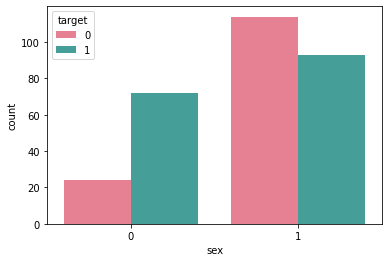

In [46]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

<AxesSubplot:xlabel='thal', ylabel='count'>

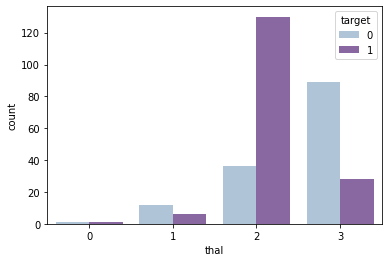

In [47]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

if thal is 2, greater chance of having heart disease

In [48]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<AxesSubplot:xlabel='sex'>

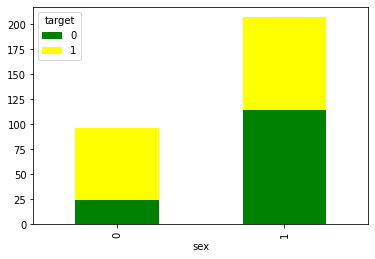

In [49]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [54]:
X= df.drop(['target'], axis=1)
y= df['target']

In [22]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [55]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

In [27]:
accuracy_score(y_test,prediction1)

0.9230769230769231

In [29]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



We observe that the recall for ‘1’ i.e having heart disease is higher that means that the algorithm is incorrectly rejecting a few cases.

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[33,  7],
       [13, 38]], dtype=int64)

In [32]:
accuracy_score(y_test,prediction2)

0.7802197802197802

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[35,  5],
       [ 7, 44]], dtype=int64)

In [35]:
accuracy_score(y_test, prediction3)

0.8681318681318682

In [37]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

In [38]:
accuracy_score(y_test, prediction4)

0.9010989010989011

In [40]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [42]:
accuracy_score(y_test, prediction5)

0.8791208791208791

In [52]:
print('Logistic Regression :', accuracy_score(y_test, prediction1))
print('Decision Tree :', accuracy_score(y_test, prediction2))
print('Random Forest :', accuracy_score(y_test, prediction3))
print('SVC : ', accuracy_score(y_test, prediction4))
print('Naive Bayes :', accuracy_score(y_test, prediction5))

Logistic Regression : 0.9230769230769231
Decision Tree : 0.7802197802197802
Random Forest : 0.8681318681318682
SVC :  0.9010989010989011
Naive Bayes : 0.8791208791208791


## Best accuracy is given by Logistic Regression : 92, followed by SVC  : 90.
